In [51]:
import xarray as xr
import numpy as np
import scipy as sc
import sklearn as skl
import skimage as ski
from scipy.linalg import norm
from scipy.spatial.distance import euclidean, jensenshannon, correlation
from scipy.stats import wasserstein_distance, ecdf
import skgstat as skg
import pysteps
from pysteps.verification.spatialscores import fss, intensity_scale
from pysteps.verification.salscores import sal
from pysteps.verification.detcontscores import det_cont_fct
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import copy

In [2]:
datapath='/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/MF_ML_PREDICT/season_2020/'
models=['graphcast_','graphcast-oper_','pangu_','pangu-oper_','ifs_']#'fcnv2_dawn','ifs']
labels=['graphcast','graphcast-oper','pangu','pangu-oper','ifs']
references=['USA_era5_convseason_2020.nc','USA_init_convseason_2020.nc']
rlabels=['era5','ifs-init']
figpath='/users/mfeldman/figs/season/'
c1='#648fff' #lightblue
c2='#785ef0' #indigo
c3='#dc267f' #magenta
c4='#fe6100' #orange
c5='#ffb000' #gold
c6='#000000' #black
colors=[c2,c1,c3,c5,c4,c6]


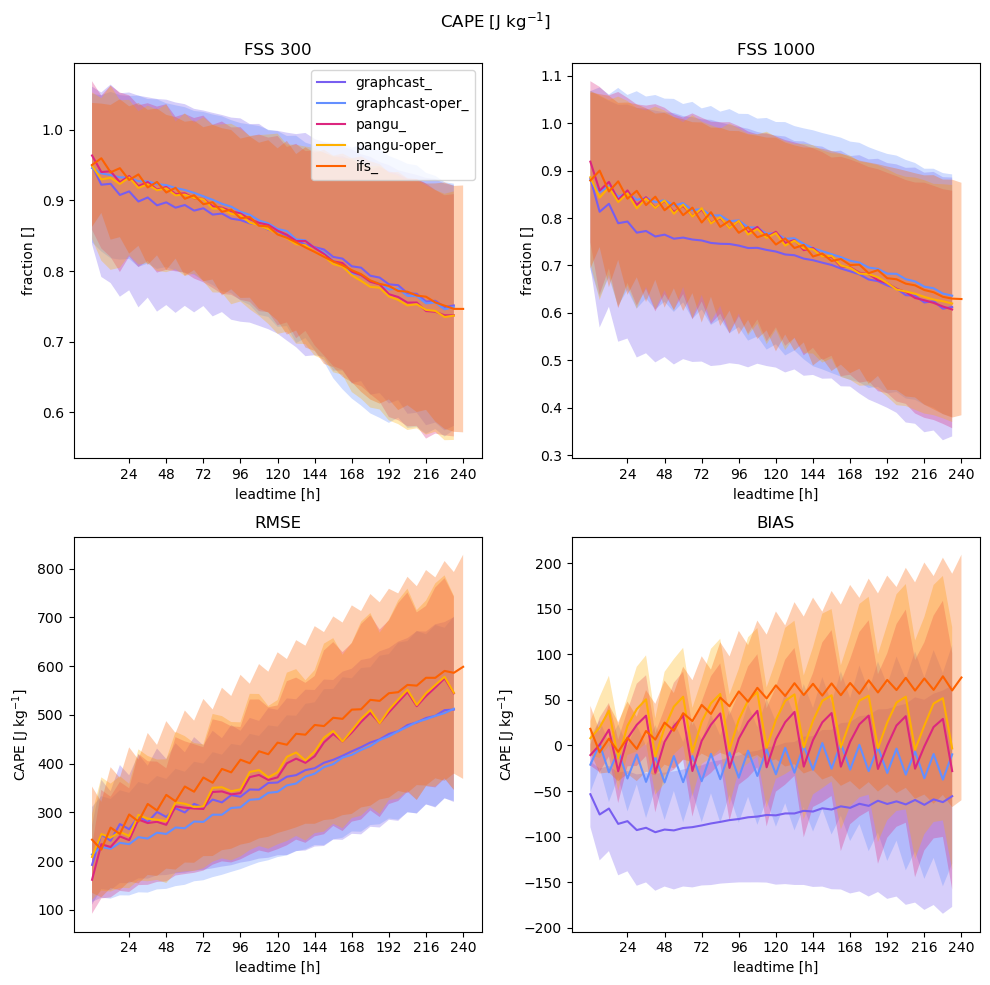

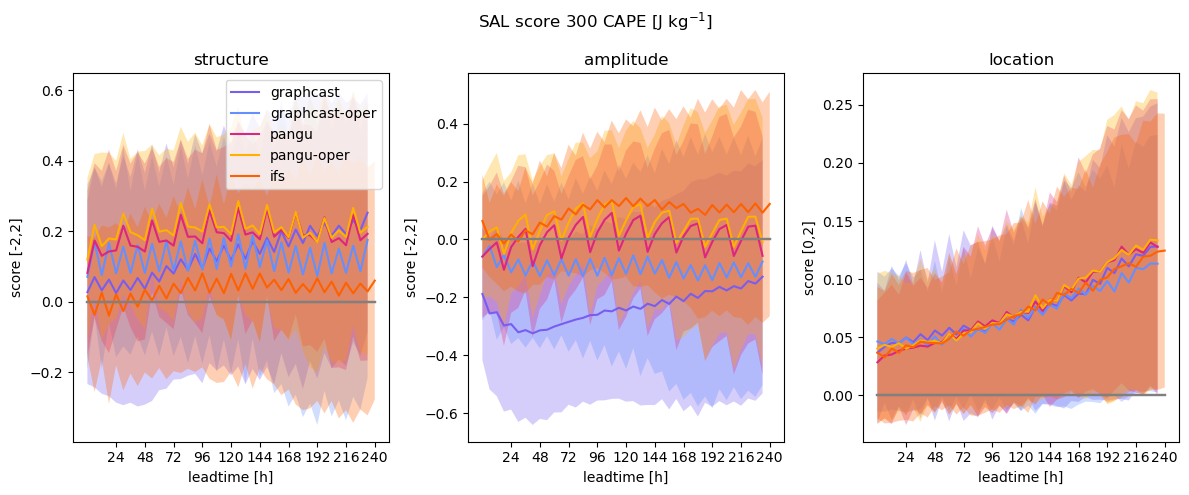

In [174]:


for mm in range(6)[:1]:
    var=['cape','cin','bs_06','bs_03','bs_01','wms'][mm]
    tit=['CAPE [J kg$^{-1}$]','CIN [J kg$^{-1}$]','0-6km shear [m s$^{-1}$]','0-3km shear [m s$^{-1}$]',
         '0-1km shear [m s$^{-1}$]','wmax-shear [m$^2$ s$^{-2}$]'][mm]
    l1=[300,-100,10,5,5,300][mm]
    l2=[1000,-300,20,10,10,500][mm]
    f1=[1,-1,1,1,1,1][mm]
    fig,axes = plt.subplots(2,2,figsize=(10,10))
    fig2,axes2 = plt.subplots(1,3,figsize=(12, 5))
    for nn in range(len(models)):
        model=models[nn]
        color=colors[nn]
        label=labels[nn]
        file=glob(datapath+model+var+'_eval_scores.nc')[0]
        scores=xr.open_dataset(file)#,engine='netcdf4')

        sal_s=scores.structure
        sal_a=scores.amplitude
        sal_l=scores.location

        rmse=scores.rmse
        bias=scores.bias
        fss_eval_300=scores.fss_low
        fss_eval_1000=scores.fss_high

        dt=scores.date
        ldt=len(scores.leadtime)

        axes2[0].plot(np.arange(ldt)*6,np.nanmean(sal_s,axis=1),c=color,label=label)
        axes2[0].plot([0,240],np.zeros(2),c='grey')
        axes2[0].fill_between(np.arange(ldt)*6,np.nanmean(sal_s,axis=1)+np.nanstd(sal_s,axis=1),
                              np.nanmean(sal_s,axis=1)-np.nanstd(sal_s,axis=1),facecolor=color,alpha=0.3)
        axes2[0].set_title('structure')
        axes2[0].set_xlabel('leadtime [h]')
        axes2[0].set_xticks(np.arange(24,258,24))
        axes2[0].set_ylabel('score [-2,2]')
        axes2[0].legend()
        axes2[1].plot(np.arange(ldt)*6,np.nanmean(sal_a,axis=1),c=color,label=label)
        axes2[1].plot([0,240],np.zeros(2),c='grey')
        axes2[1].fill_between(np.arange(ldt)*6,np.nanmean(sal_a,axis=1)+np.nanstd(sal_a,axis=1),
                              np.nanmean(sal_a,axis=1)-np.nanstd(sal_a,axis=1),facecolor=color,alpha=0.3)
        axes2[1].set_title('amplitude')
        axes2[1].set_xlabel('leadtime [h]')
        axes2[1].set_xticks(np.arange(24,258,24))
        axes2[1].set_ylabel('score [-2,2]')
        #axes2[1].legend()
        axes2[2].plot(np.arange(ldt)*6,np.nanmean(sal_l,axis=1),c=color)
        axes2[2].plot([0,240],np.zeros(2),c='grey')
        axes2[2].fill_between(np.arange(ldt)*6,np.nanmean(sal_l,axis=1)+np.nanstd(sal_l,axis=1),
                              np.nanmean(sal_l,axis=1)-np.nanstd(sal_l,axis=1),facecolor=color,alpha=0.3)
        axes2[2].set_title('location')
        axes2[2].set_xlabel('leadtime [h]')
        axes2[2].set_xticks(np.arange(24,258,24))
        axes2[2].set_ylabel('score [0,2]')
        fig2.suptitle('SAL score '+str(l1)+' '+tit)
    
    
        axes[0,0].plot(np.arange(ldt)*6,np.nanmean(fss_eval_300,axis=1),c=color,label=model)
        axes[0,0].fill_between(np.arange(ldt)*6,np.nanmean(fss_eval_300,axis=1)+np.nanstd(fss_eval_300,axis=1),
                              np.nanmean(fss_eval_300,axis=1)-np.nanstd(fss_eval_300,axis=1),facecolor=color,alpha=0.3)
        axes[0,0].set_title('FSS '+str(l1))
        axes[0,0].set_xlabel('leadtime [h]')
        axes[0,0].set_xticks(np.arange(24,258,24))
        axes[0,0].set_ylabel('fraction []')
        axes[0,0].legend()
        axes[0,1].plot(np.arange(ldt)*6,np.nanmean(fss_eval_1000,axis=1),c=color,label=model)
        axes[0,1].fill_between(np.arange(ldt)*6,np.nanmean(fss_eval_1000,axis=1)+np.nanstd(fss_eval_1000,axis=1),
                              np.nanmean(fss_eval_1000,axis=1)-np.nanstd(fss_eval_1000,axis=1),facecolor=color,alpha=0.3)
        axes[0,1].set_title('FSS '+str(l2))
        axes[0,1].set_xlabel('leadtime [h]')
        axes[0,1].set_xticks(np.arange(24,258,24))
        axes[0,1].set_ylabel('fraction []')
        axes[1,0].plot(np.arange(ldt)*6,np.nanmean(rmse,axis=1),c=color)
        axes[1,0].fill_between(np.arange(ldt)*6,np.nanmean(rmse,axis=1)+np.nanstd(rmse,axis=1),
                              np.nanmean(rmse,axis=1)-np.nanstd(rmse,axis=1),facecolor=color,alpha=0.3)
        axes[1,0].set_title('RMSE')
        axes[1,0].set_xlabel('leadtime [h]')
        axes[1,0].set_xticks(np.arange(24,258,24))
        axes[1,0].set_ylabel(tit)
        axes[1,1].plot(np.arange(ldt)*6,np.nanmean(bias,axis=1),c=color)
        axes[1,1].fill_between(np.arange(ldt)*6,np.nanmean(bias,axis=1)+np.nanstd(bias,axis=1),
                              np.nanmean(bias,axis=1)-np.nanstd(bias,axis=1),facecolor=color,alpha=0.3)
        axes[1,1].set_title('BIAS')
        axes[1,1].set_xlabel('leadtime [h]')
        axes[1,1].set_xticks(np.arange(24,258,24))
        axes[1,1].set_ylabel(tit)
        fig.suptitle(tit)
    
    
    fig2.tight_layout()
    fig2.show()
    fig2.savefig(figpath+var+'_sal_scores_mom.png')
    
    fig.tight_layout()
    fig.show()
    fig.savefig(figpath+var+'_err_scores_mom.png')


IndexError: list index out of range

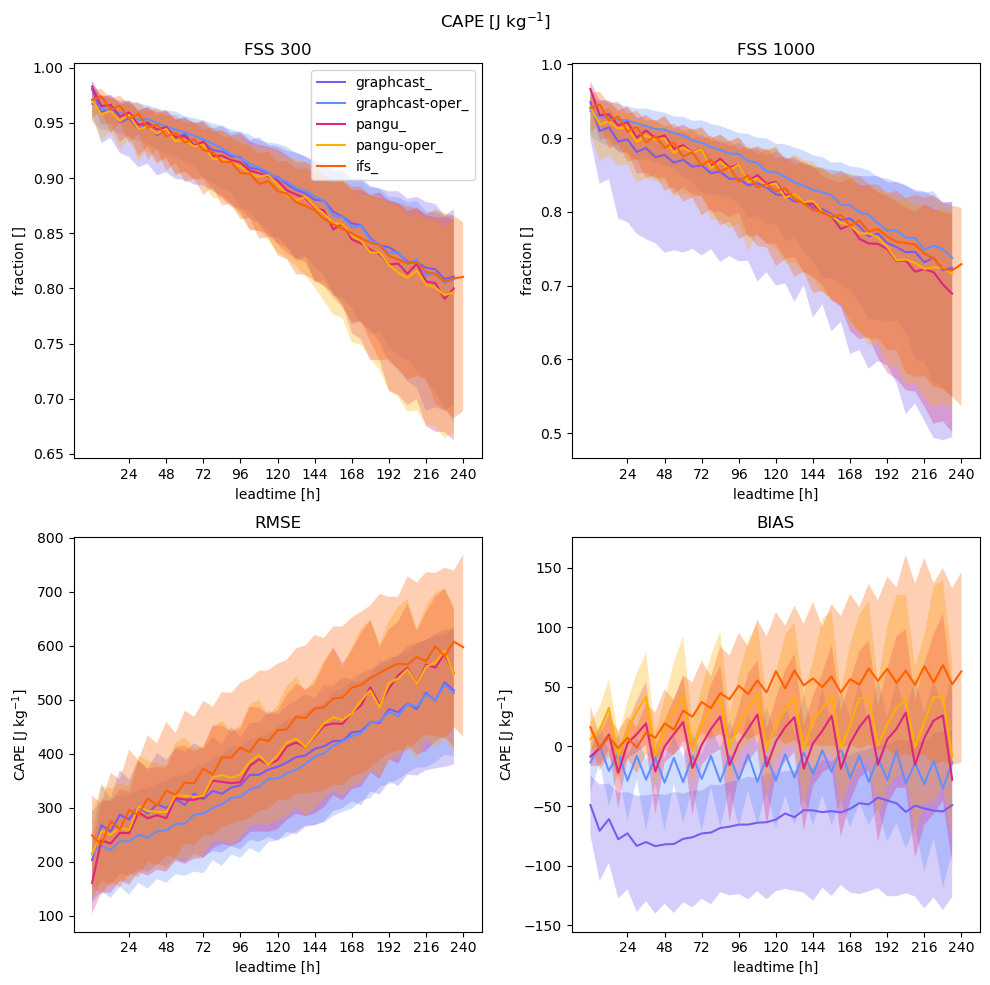

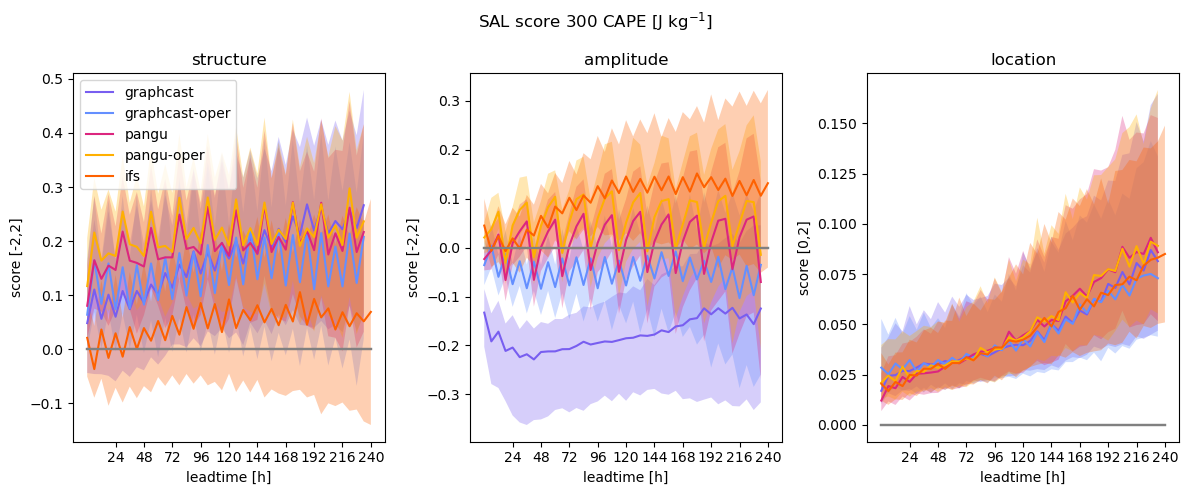

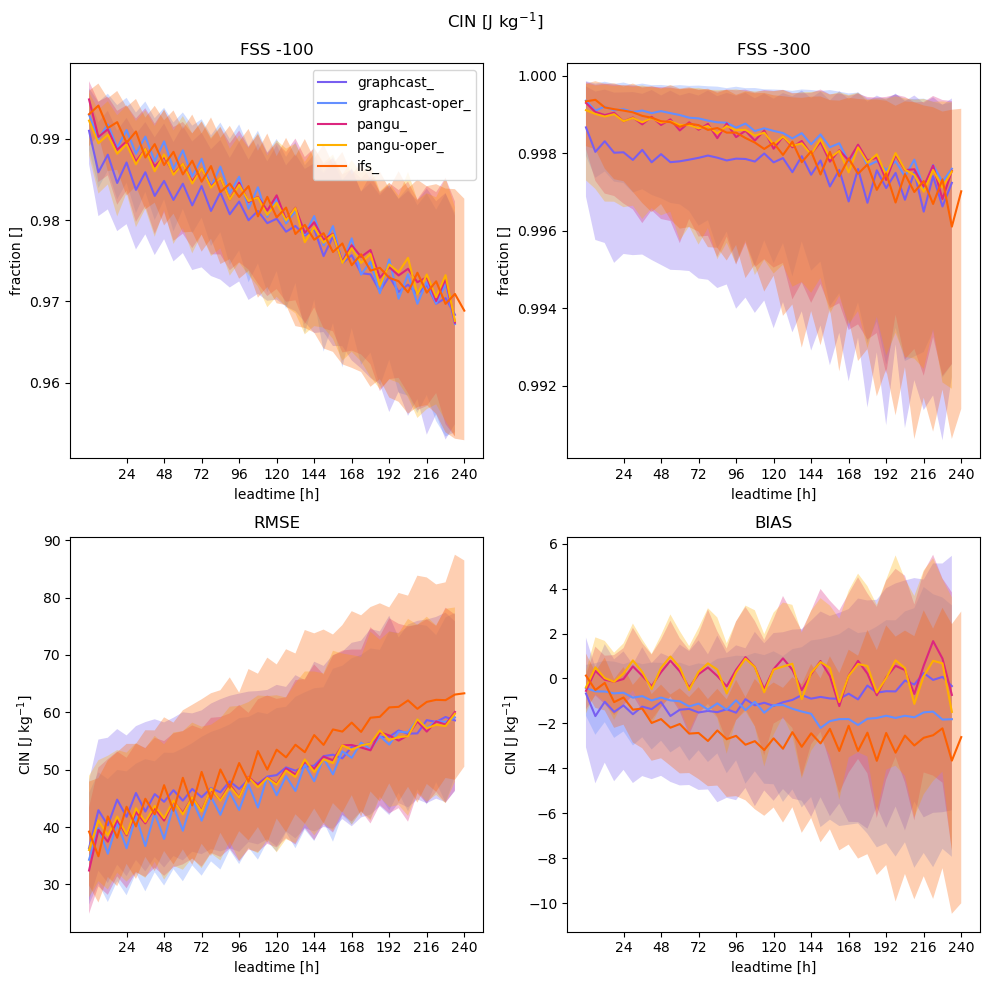

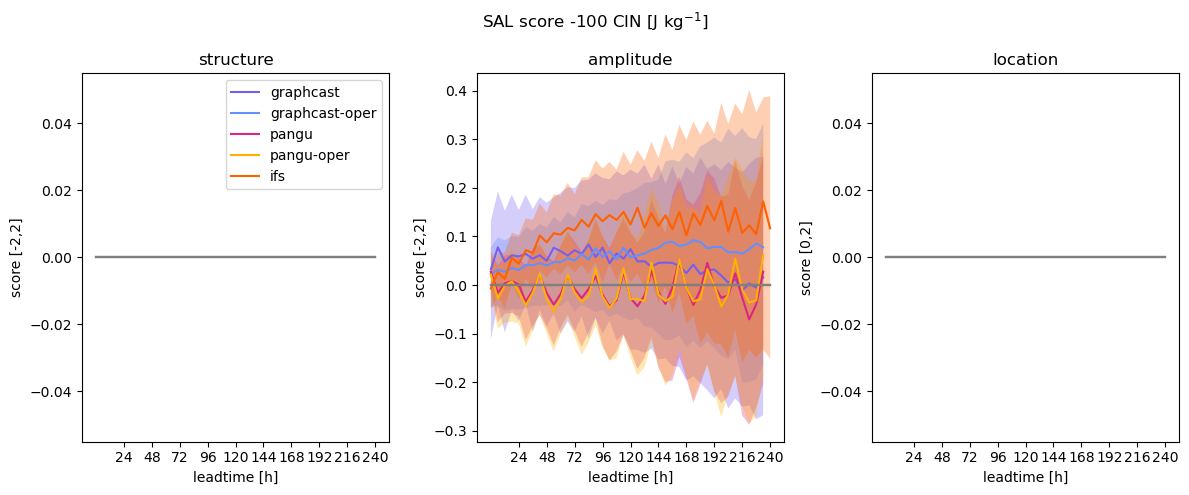

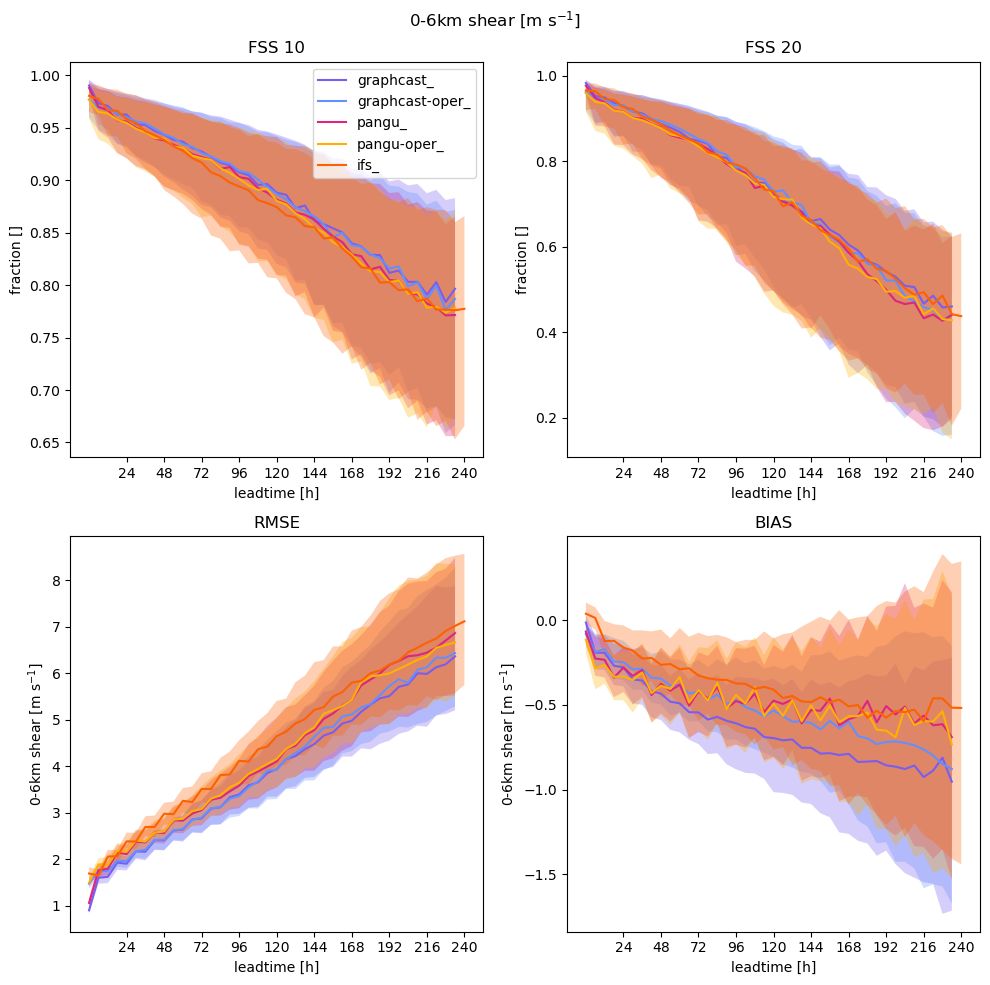

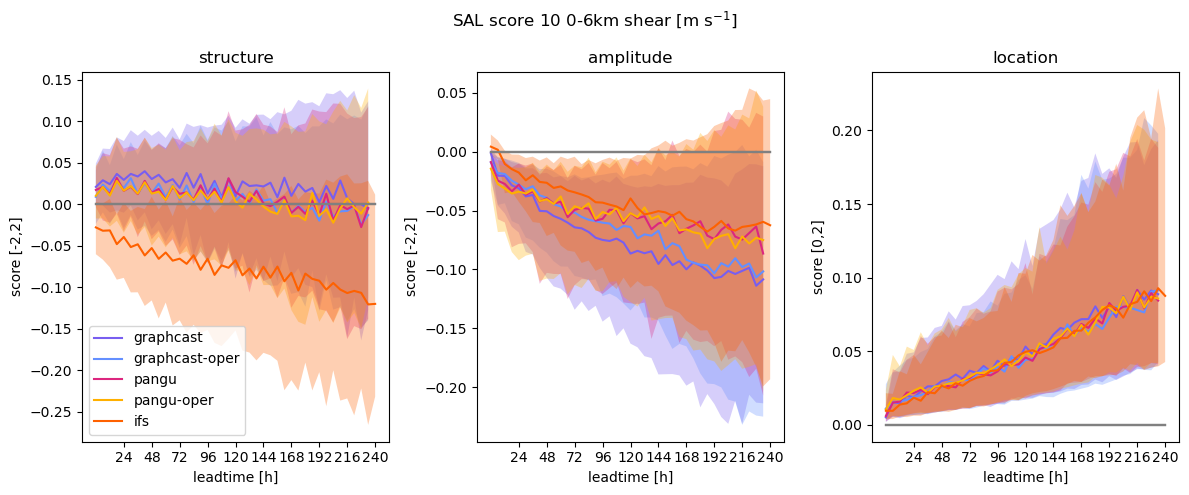

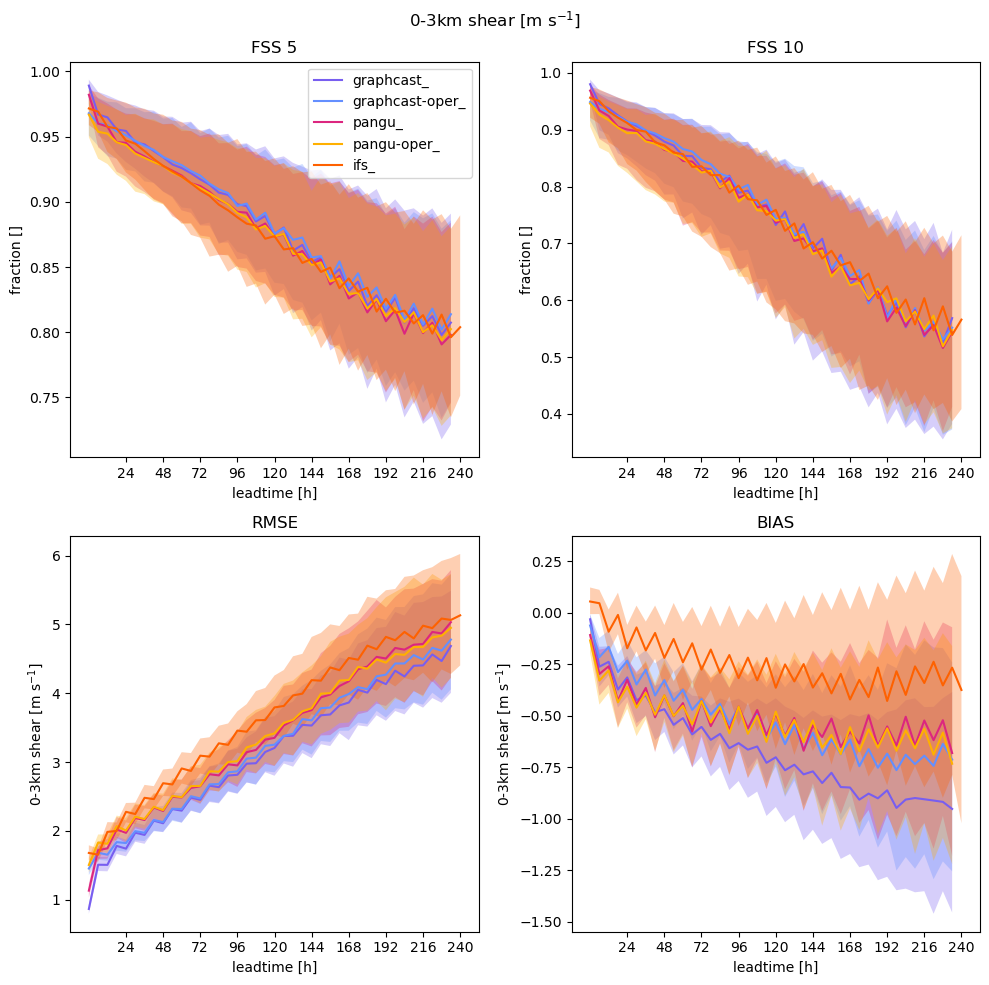

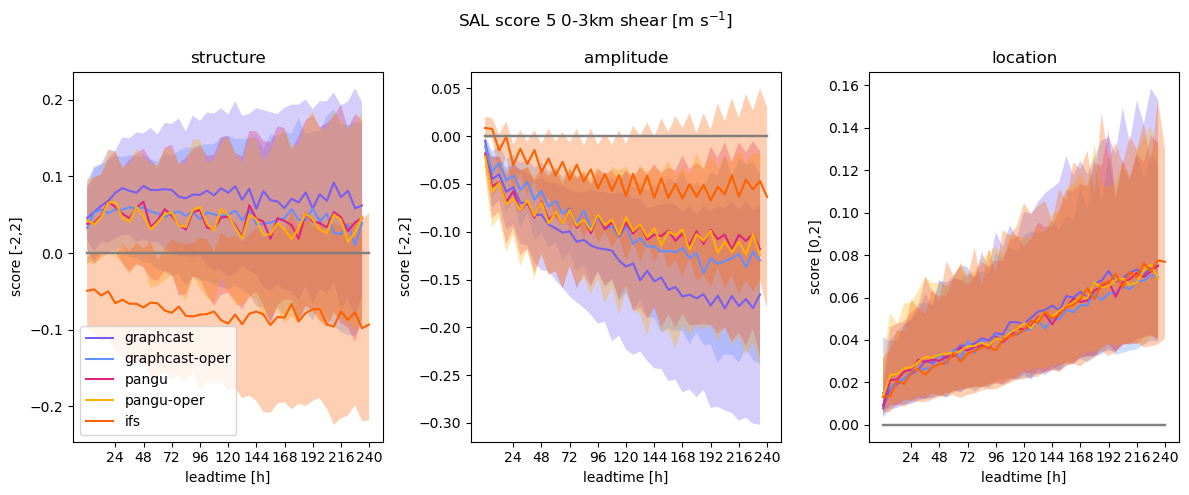

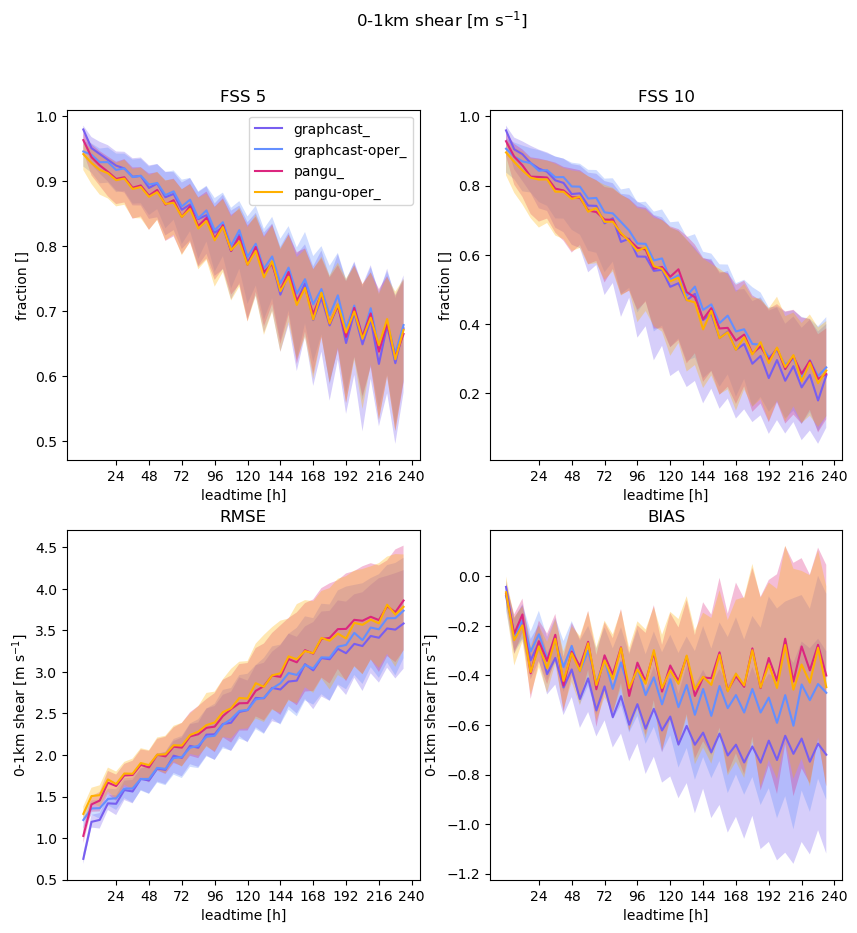

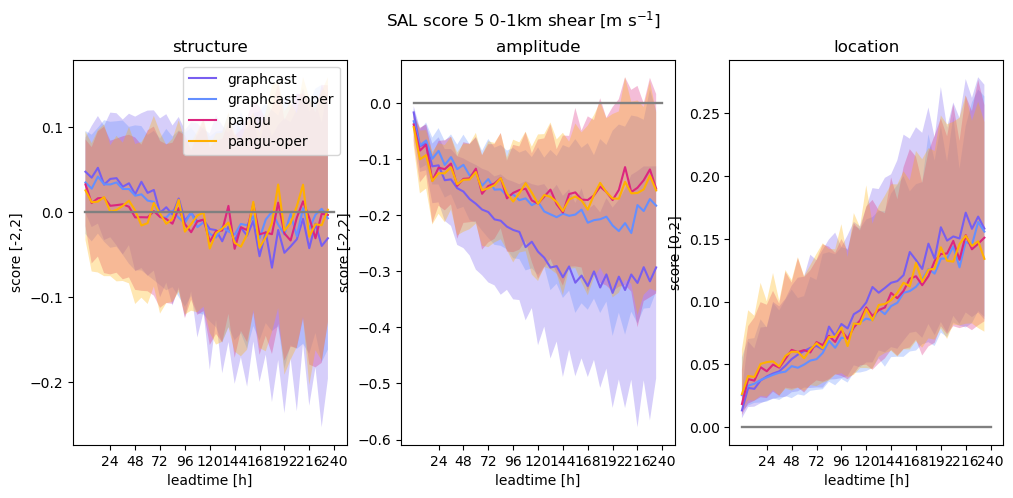

In [173]:


for mm in range(6)[:]:
    var=['cape','cin','bs_06','bs_03','bs_01','wms'][mm]
    tit=['CAPE [J kg$^{-1}$]','CIN [J kg$^{-1}$]','0-6km shear [m s$^{-1}$]','0-3km shear [m s$^{-1}$]',
         '0-1km shear [m s$^{-1}$]','wmax-shear [m$^2$ s$^{-2}$]'][mm]
    l1=[300,-100,10,5,5,300][mm]
    l2=[1000,-300,20,10,10,500][mm]
    f1=[1,-1,1,1,1,1][mm]
    fig,axes = plt.subplots(2,2,figsize=(10,10))
    fig2,axes2 = plt.subplots(1,3,figsize=(12, 5))
    for nn in range(len(models)):
        model=models[nn]
        color=colors[nn]
        label=labels[nn]
        file=glob(datapath+model+var+'_eval_scores.nc')[0]
        scores=xr.open_dataset(file)#,engine='netcdf4')

        sal_s=scores.structure
        sal_a=scores.amplitude
        sal_l=scores.location

        rmse=scores.rmse
        bias=scores.bias
        fss_eval_300=scores.fss_low
        fss_eval_1000=scores.fss_high

        dt=scores.date
        ldt=len(scores.leadtime)

        axes2[0].plot(np.arange(ldt)*6,np.nanmedian(sal_s,axis=1),c=color,label=label)
        axes2[0].plot([0,240],np.zeros(2),c='grey')
        axes2[0].fill_between(np.arange(ldt)*6,np.nanpercentile(sal_s,75,axis=1),
                              np.nanpercentile(sal_s,25,axis=1),facecolor=color,alpha=0.3)
        axes2[0].set_title('structure')
        axes2[0].set_xlabel('leadtime [h]')
        axes2[0].set_xticks(np.arange(24,258,24))
        axes2[0].set_ylabel('score [-2,2]')
        axes2[0].legend()
        axes2[1].plot(np.arange(ldt)*6,np.nanmedian(sal_a,axis=1),c=color,label=label)
        axes2[1].plot([0,240],np.zeros(2),c='grey')
        axes2[1].fill_between(np.arange(ldt)*6,np.nanpercentile(sal_a,75,axis=1),
                              np.nanpercentile(sal_a,25,axis=1),facecolor=color,alpha=0.3)
        axes2[1].set_title('amplitude')
        axes2[1].set_xlabel('leadtime [h]')
        axes2[1].set_xticks(np.arange(24,258,24))
        axes2[1].set_ylabel('score [-2,2]')
        #axes2[1].legend()
        axes2[2].plot(np.arange(ldt)*6,np.nanmedian(sal_l,axis=1),c=color)
        axes2[2].plot([0,240],np.zeros(2),c='grey')
        axes2[2].fill_between(np.arange(ldt)*6,np.nanpercentile(sal_l,75,axis=1),
                              np.nanpercentile(sal_l,25,axis=1),facecolor=color,alpha=0.3)
        axes2[2].set_title('location')
        axes2[2].set_xlabel('leadtime [h]')
        axes2[2].set_xticks(np.arange(24,258,24))
        axes2[2].set_ylabel('score [0,2]')
        fig2.suptitle('SAL score '+str(l1)+' '+tit)
    
    
        axes[0,0].plot(np.arange(ldt)*6,np.nanmedian(fss_eval_300,axis=1),c=color,label=model)
        axes[0,0].fill_between(np.arange(ldt)*6,np.nanpercentile(fss_eval_300,75,axis=1),
                              np.nanpercentile(fss_eval_300,25,axis=1),facecolor=color,alpha=0.3)
        axes[0,0].set_title('FSS '+str(l1))
        axes[0,0].set_xlabel('leadtime [h]')
        axes[0,0].set_xticks(np.arange(24,258,24))
        axes[0,0].set_ylabel('fraction []')
        axes[0,0].legend()
        axes[0,1].plot(np.arange(ldt)*6,np.nanmedian(fss_eval_1000,axis=1),c=color,label=model)
        axes[0,1].fill_between(np.arange(ldt)*6,np.nanpercentile(fss_eval_1000,75,axis=1),
                              np.nanpercentile(fss_eval_1000,25,axis=1),facecolor=color,alpha=0.3)
        axes[0,1].set_title('FSS '+str(l2))
        axes[0,1].set_xlabel('leadtime [h]')
        axes[0,1].set_xticks(np.arange(24,258,24))
        axes[0,1].set_ylabel('fraction []')
        axes[1,0].plot(np.arange(ldt)*6,np.nanmedian(rmse,axis=1),c=color)
        axes[1,0].fill_between(np.arange(ldt)*6,np.nanpercentile(rmse,75,axis=1),
                              np.nanpercentile(rmse,25,axis=1),facecolor=color,alpha=0.3)
        axes[1,0].set_title('RMSE')
        axes[1,0].set_xlabel('leadtime [h]')
        axes[1,0].set_xticks(np.arange(24,258,24))
        axes[1,0].set_ylabel(tit)
        axes[1,1].plot(np.arange(ldt)*6,np.nanmedian(bias,axis=1),c=color)
        axes[1,1].fill_between(np.arange(ldt)*6,np.nanpercentile(bias,75,axis=1),
                              np.nanpercentile(bias,25,axis=1),facecolor=color,alpha=0.3)
        axes[1,1].set_title('BIAS')
        axes[1,1].set_xlabel('leadtime [h]')
        axes[1,1].set_xticks(np.arange(24,258,24))
        axes[1,1].set_ylabel(tit)
        fig.suptitle(tit)
    
    
    fig2.tight_layout()
    fig2.show()
    fig2.savefig(figpath+var+'_sal_scores_prctl.png')
    
    fig.tight_layout()
    fig.show()
    fig.savefig(figpath+var+'_err_scores_prctl.png')


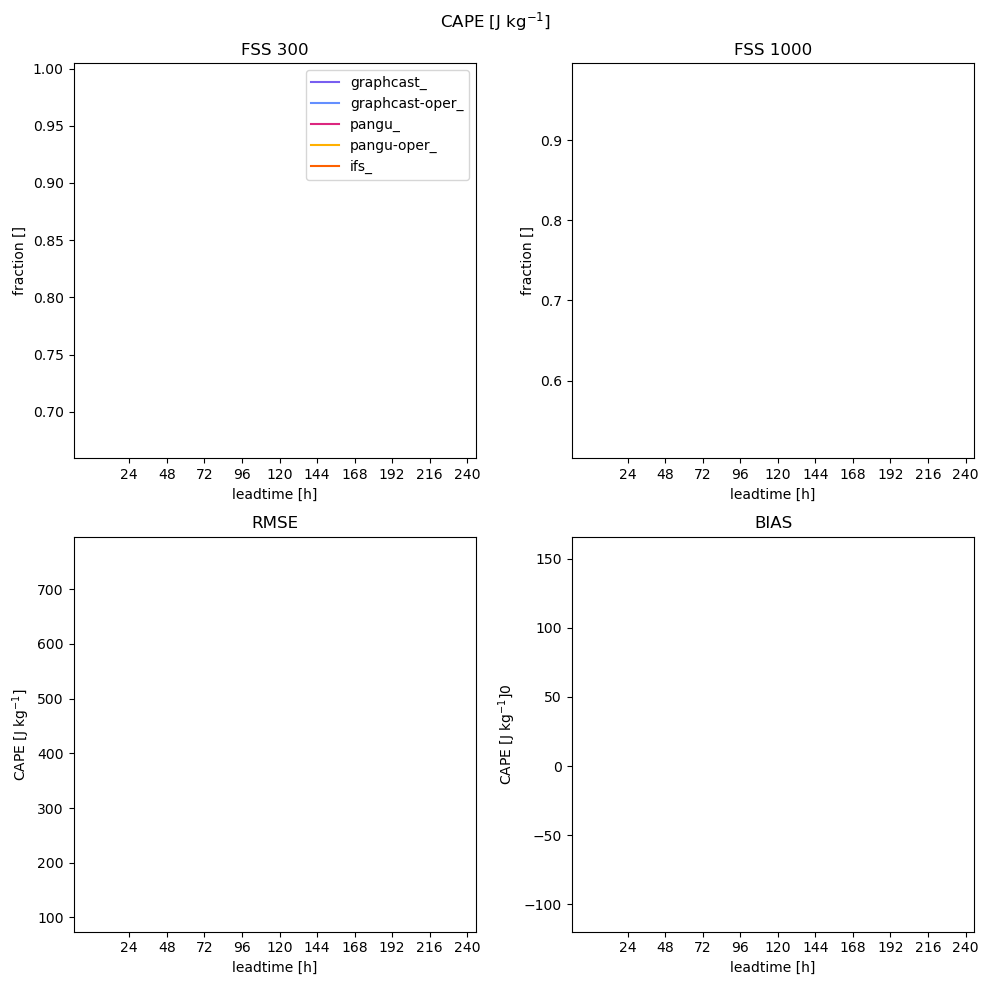

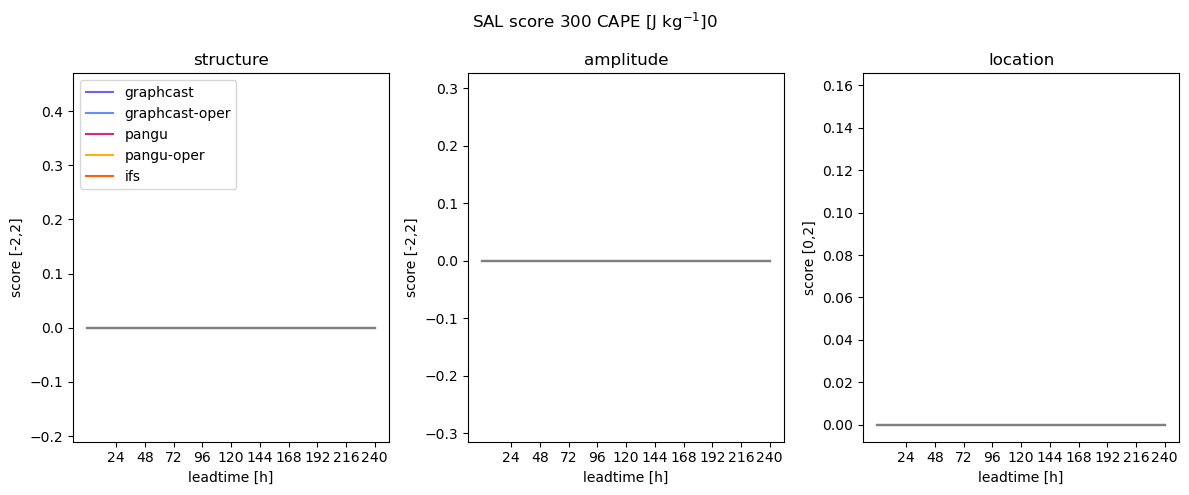

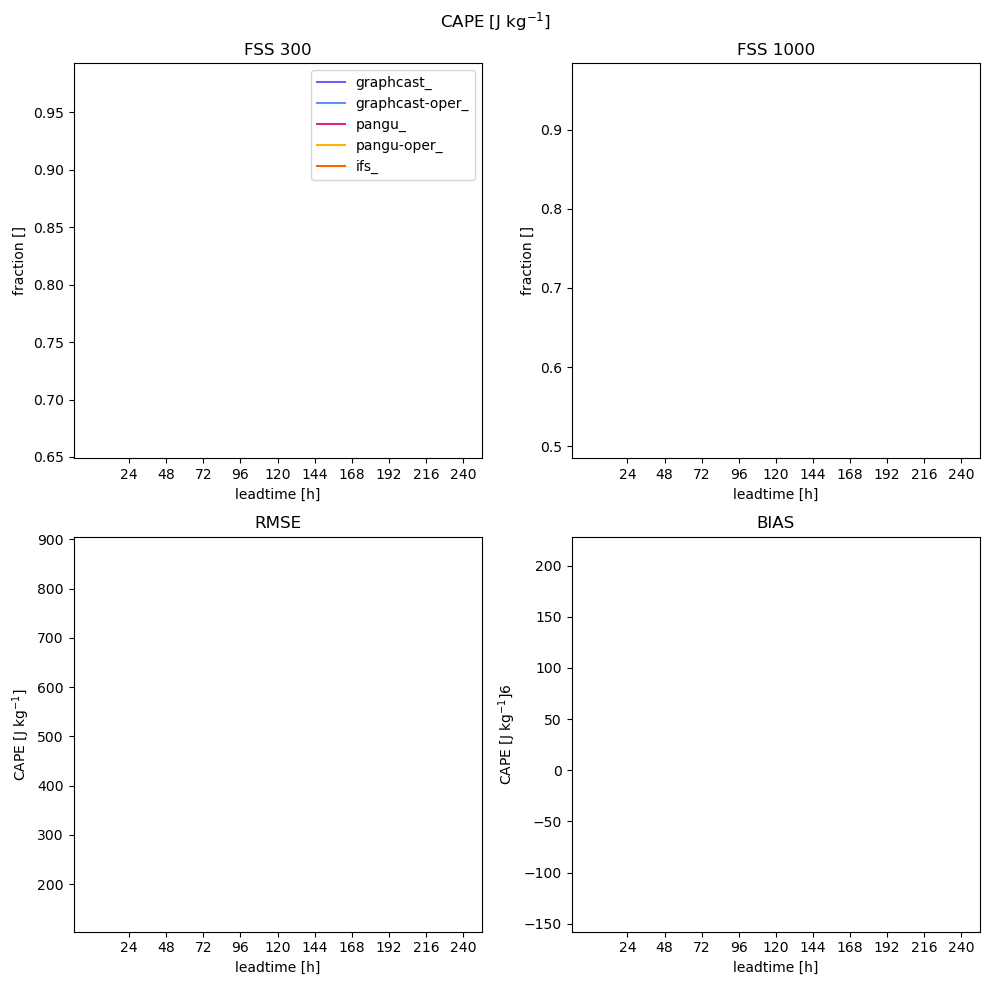

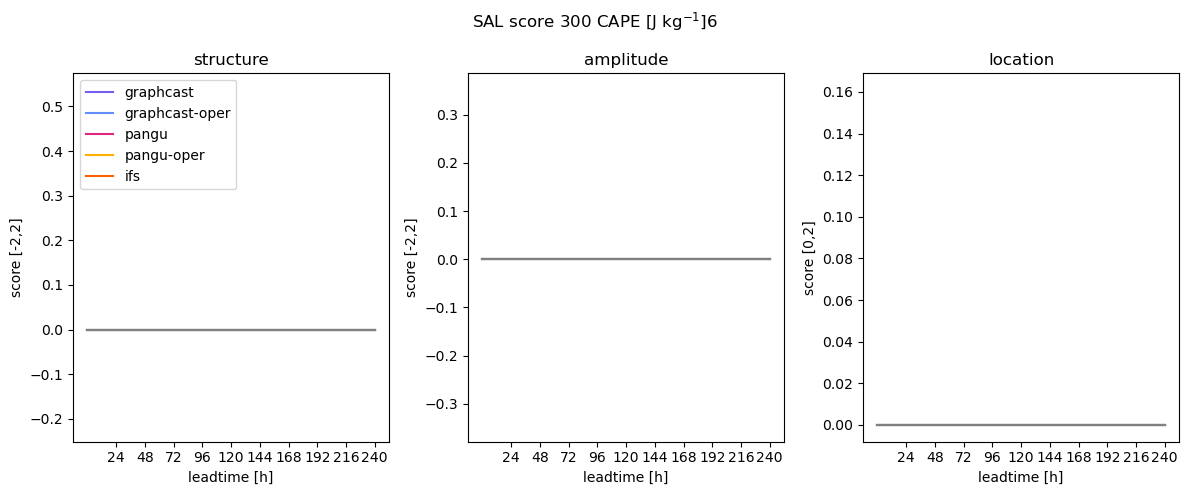

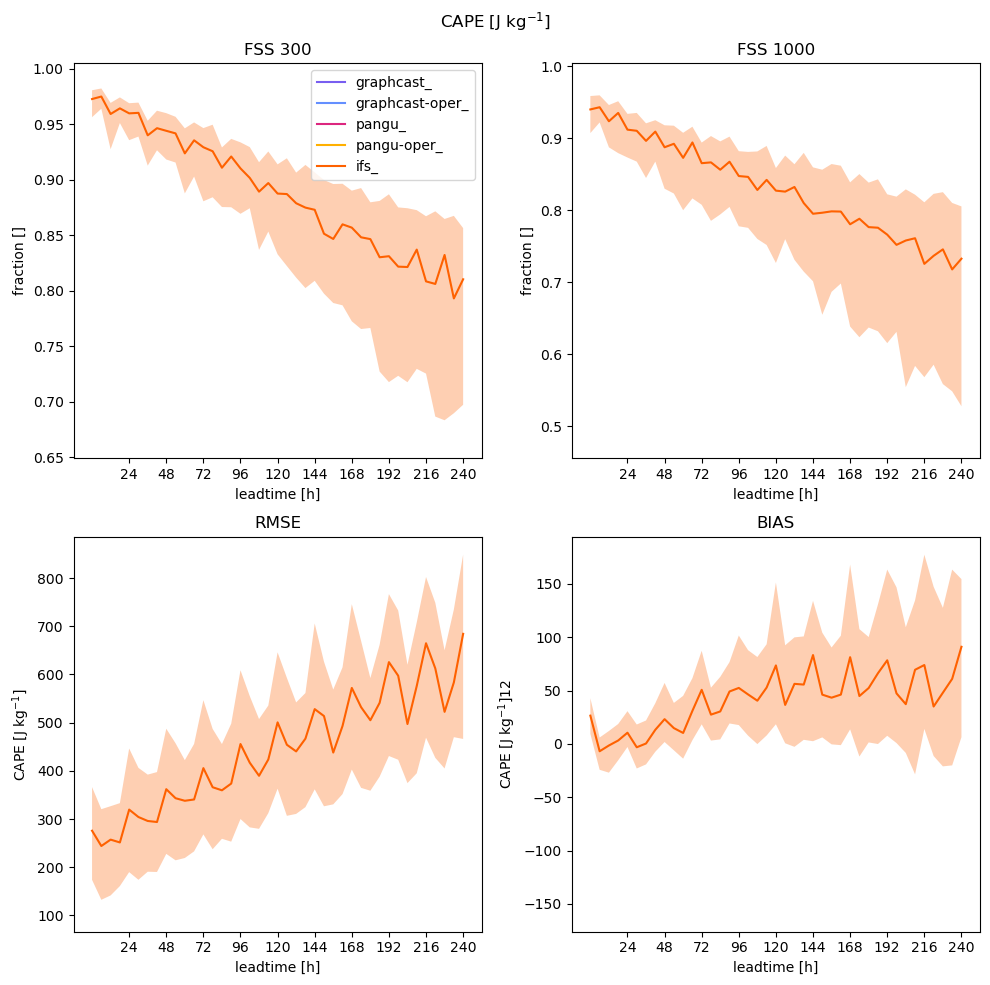

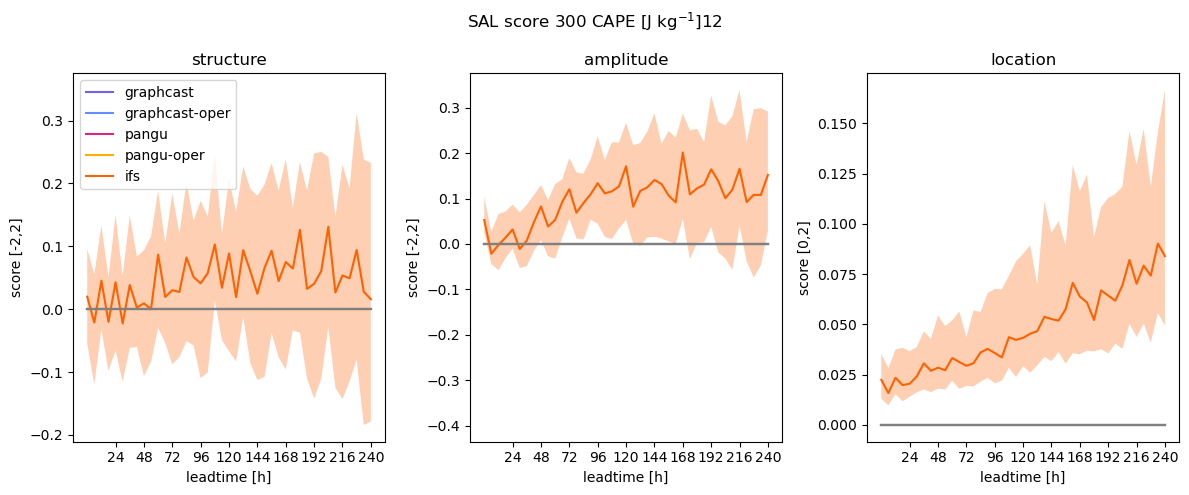

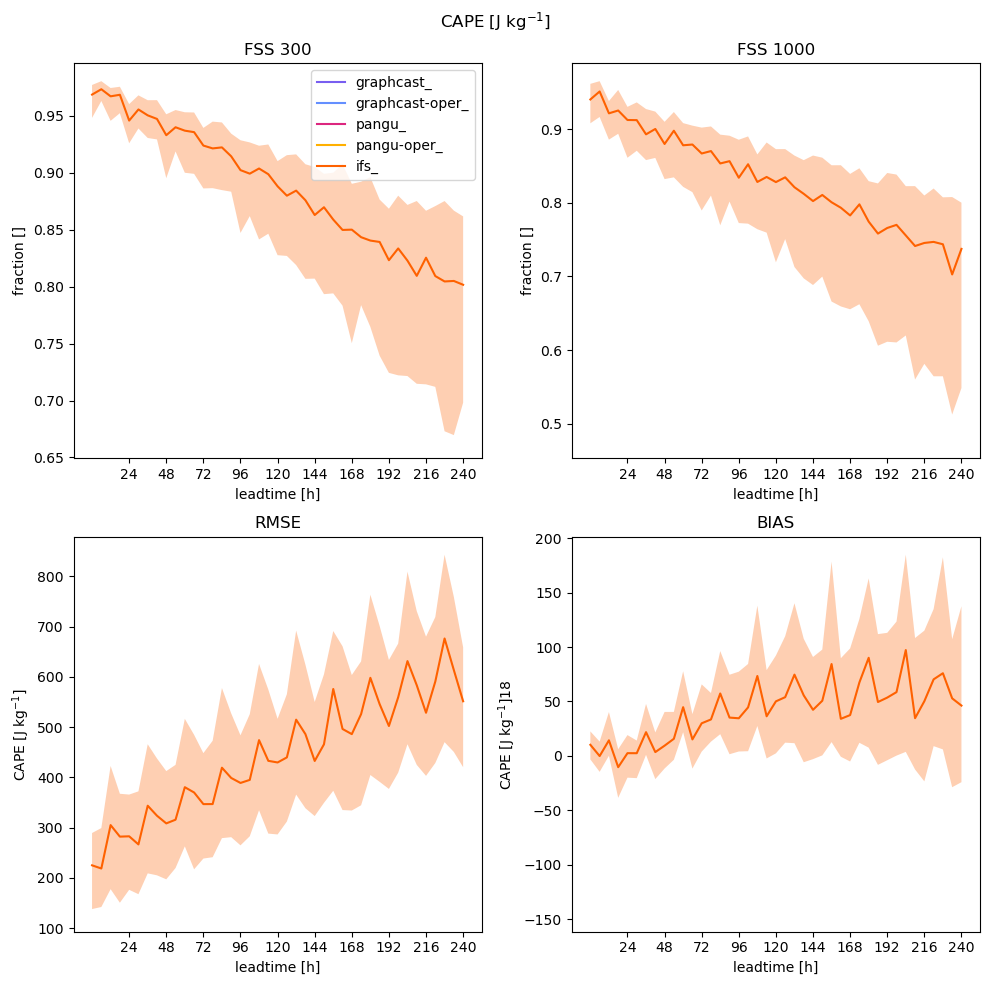

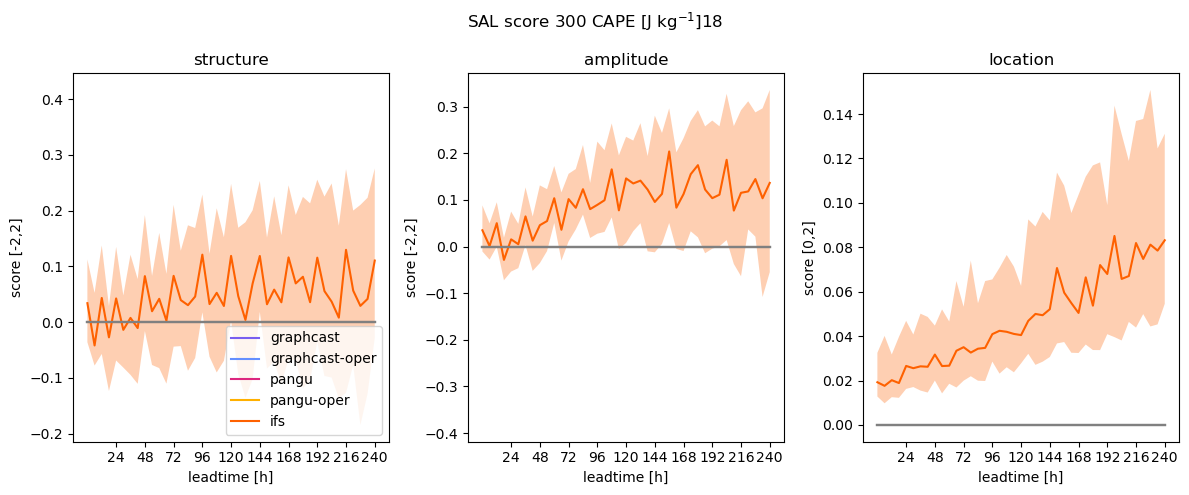

In [171]:
times=[0,6,12,18]
for tt in range(len(times)):
    for mm in range(6)[:1]:
        var=['cape','cin','bs_06','bs_03','bs_01','wms'][mm]
        tit=['CAPE [J kg$^{-1}$]','CIN [J kg$^{-1}$]','0-6km shear [m s$^{-1}$]','0-3km shear [m s$^{-1}$]',
             '0-1km shear [m s$^{-1}$]','wmax-shear [m$^2$ s$^{-2}$]'][mm]
        l1=[300,-100,10,5,5,300][mm]
        l2=[1000,-300,20,10,10,500][mm]
        f1=[1,-1,1,1,1,1][mm]
        fig,axes = plt.subplots(2,2,figsize=(10,10))
        fig2,axes2 = plt.subplots(1,3,figsize=(12, 5))
        for nn in range(len(models))[:]:
            model=models[nn]
            color=colors[nn]
            label=labels[nn]
            file=glob(datapath+model+var+'_eval_scores.nc')[0]
            scores=xr.open_dataset(file)#,engine='netcdf4')
    
            dt=scores.date
            ldt=len(scores.leadtime)
            
            sal_s_tot=scores.structure
            sal_a_tot=scores.amplitude
            sal_l_tot=scores.location
    
            rmse_tot=scores.rmse
            bias_tot=scores.bias
            fss_eval_300_tot=scores.fss_low
            fss_eval_1000_tot=scores.fss_high
            
            a,b=bias_tot.shape
            X,Y=np.meshgrid((np.arange(2*b)[::2]) +1,np.arange(a) +1)
            Z=( X*Y -1)
            B=(np.arange(a*b).reshape(bias_tot.shape,order='F')%4); B[:,::2]+=2
            
            ind=np.where(B==tt)

            data=np.zeros(bias_tot.shape)
            data[:]=np.nan

            sal_s=copy.deepcopy(data); sal_s[ind]=sal_s_tot.values[ind]
            sal_a=copy.deepcopy(data); sal_a[ind]=sal_a_tot.values[ind]
            sal_l=copy.deepcopy(data); sal_l[ind]=sal_l_tot.values[ind]

            rmse=copy.deepcopy(data); rmse[ind]=rmse_tot.values[ind]
            bias=copy.deepcopy(data); bias[ind]=bias_tot.values[ind]
            fss_eval_300=copy.deepcopy(data); fss_eval_300[ind]=fss_eval_300_tot.values[ind]
            fss_eval_1000=copy.deepcopy(data); fss_eval_1000[ind]=fss_eval_1000_tot.values[ind]
            

            axes2[0].plot(np.arange(ldt)*6,np.nanmedian(sal_s,axis=1),c=color,label=label)
            axes2[0].plot([0,240],np.zeros(2),c='grey')
            axes2[0].fill_between(np.arange(ldt)*6,np.nanpercentile(sal_s,75,axis=1),
                                  np.nanpercentile(sal_s,25,axis=1),facecolor=color,alpha=0.3)
            axes2[0].set_title('structure')
            axes2[0].set_xlabel('leadtime [h]')
            axes2[0].set_xticks(np.arange(24,258,24))
            axes2[0].set_ylabel('score [-2,2]')
            axes2[0].legend()
            axes2[1].plot(np.arange(ldt)*6,np.nanmedian(sal_a,axis=1),c=color,label=label)
            axes2[1].plot([0,240],np.zeros(2),c='grey')
            axes2[1].fill_between(np.arange(ldt)*6,np.nanpercentile(sal_a,75,axis=1),
                                  np.nanpercentile(sal_a,25,axis=1),facecolor=color,alpha=0.3)
            axes2[1].set_title('amplitude')
            axes2[1].set_xlabel('leadtime [h]')
            axes2[1].set_xticks(np.arange(24,258,24))
            axes2[1].set_ylabel('score [-2,2]')
            #axes2[1].legend()
            axes2[2].plot(np.arange(ldt)*6,np.nanmedian(sal_l,axis=1),c=color)
            axes2[2].plot([0,240],np.zeros(2),c='grey')
            axes2[2].fill_between(np.arange(ldt)*6,np.nanpercentile(sal_l,75,axis=1),
                                  np.nanpercentile(sal_l,25,axis=1),facecolor=color,alpha=0.3)
            axes2[2].set_title('location')
            axes2[2].set_xlabel('leadtime [h]')
            axes2[2].set_xticks(np.arange(24,258,24))
            axes2[2].set_ylabel('score [0,2]')
            fig2.suptitle('SAL score '+str(l1)+' '+tit+str(times[tt]))
        
        
            axes[0,0].plot(np.arange(ldt)*6,np.nanmedian(fss_eval_300,axis=1),c=color,label=model)
            axes[0,0].fill_between(np.arange(ldt)*6,np.nanpercentile(fss_eval_300,75,axis=1),
                                  np.nanpercentile(fss_eval_300,25,axis=1),facecolor=color,alpha=0.3)
            axes[0,0].set_title('FSS '+str(l1))
            axes[0,0].set_xlabel('leadtime [h]')
            axes[0,0].set_xticks(np.arange(24,258,24))
            axes[0,0].set_ylabel('fraction []')
            axes[0,0].legend()
            axes[0,1].plot(np.arange(ldt)*6,np.nanmedian(fss_eval_1000,axis=1),c=color,label=model)
            axes[0,1].fill_between(np.arange(ldt)*6,np.nanpercentile(fss_eval_1000,75,axis=1),
                                  np.nanpercentile(fss_eval_1000,25,axis=1),facecolor=color,alpha=0.3)
            axes[0,1].set_title('FSS '+str(l2))
            axes[0,1].set_xlabel('leadtime [h]')
            axes[0,1].set_xticks(np.arange(24,258,24))
            axes[0,1].set_ylabel('fraction []')
            axes[1,0].plot(np.arange(ldt)*6,np.nanmedian(rmse,axis=1),c=color)
            axes[1,0].fill_between(np.arange(ldt)*6,np.nanpercentile(rmse,75,axis=1),
                                  np.nanpercentile(rmse,25,axis=1),facecolor=color,alpha=0.3)
            axes[1,0].set_title('RMSE')
            axes[1,0].set_xlabel('leadtime [h]')
            axes[1,0].set_xticks(np.arange(24,258,24))
            axes[1,0].set_ylabel(tit)
            axes[1,1].plot(np.arange(ldt)*6,np.nanmedian(bias,axis=1),c=color)
            axes[1,1].fill_between(np.arange(ldt)*6,np.nanpercentile(bias,75,axis=1),
                                  np.nanpercentile(bias,25,axis=1),facecolor=color,alpha=0.3)
            axes[1,1].set_title('BIAS')
            axes[1,1].set_xlabel('leadtime [h]')
            axes[1,1].set_xticks(np.arange(24,258,24))
            axes[1,1].set_ylabel(tit+str(times[tt]))
            fig.suptitle(tit)
    
    
        fig2.tight_layout()
        fig2.show()
        fig2.savefig(figpath+var+str(times[tt])+'_sal_scores_prctl.png')
        
        fig.tight_layout()
        fig.show()
        fig.savefig(figpath+var+str(times[tt])+'_err_scores_prctl.png')

In [109]:
rmse.shape

(40, 427)

In [170]:
np.nansum(rmse_tot>0)

16240